In [43]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (20,10)

%matplotlib inline

# Simulated Healthy Data #

In [44]:
df_healthy = pd.read_csv('hypoxia/healthy/scaled_inflection/sensitivities.txt', sep='\t')
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df_healthy = df_healthy.query("Parameter!='{}'".format(p))
    
df_experimental = pd.read_csv('hypoxia/experimental/scaled_inflection/sensitivities.txt', sep='\t')
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df_experimental = df_experimental.query("Parameter!='{}'".format(p))

In [45]:
sim_title_dict = {"TOTAL": "all outputs", "CCO": "cytochrome-c-oxidase", "HbO2": "oxyhaemoglobin", "HHb": "deoxyhaemoglobin", "TOI": "TOI"}
exp_title_dict = {"TOTAL": "all outputs", "CCO": "cytochrome-c-oxidase", "HbT": "total haemoglobin", "HbD": "haemoglobin difference", "TOI": "TOI"}

def sensitivity(df, output, title_dict=None):      
    params = [output+"_mu_star", output+"_sigma", "Parameter"]
    sens = df[params]
    sens = sens.rename(columns={output+"_mu_star": "mu_star", output+"_sigma": "sigma"})
    sens.sort_values(by="mu_star", ascending=False, inplace=True)
    sens_head = sens.head(10)
    with sns.plotting_context("talk"):
        fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(6,6))
        if output != "CCO":
            ax.set(xscale="log", yscale="log")
        plt.grid(True, linestyle=':')
        ax = sns.scatterplot(x="mu_star", y="sigma", data=sens_head, ax=ax, hue="Parameter")
        ax.set_ylabel("$\sigma$")
        ax.set_xlabel("$\mu_{*}$")
        if title_dict:
            ax.set_title("Sensitivity for {}".format(title_dict[output]))
        if output != "CCO":
            lgd = ax.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
        else:
            lgd = ax.legend(loc="upper right", bbox_to_anchor=(1.55, 1))

    
    return fig, ax, lgd, sens_head

Working on TOTAL
Working on HHb
Working on HbO2
Working on CCO
Working on TOI


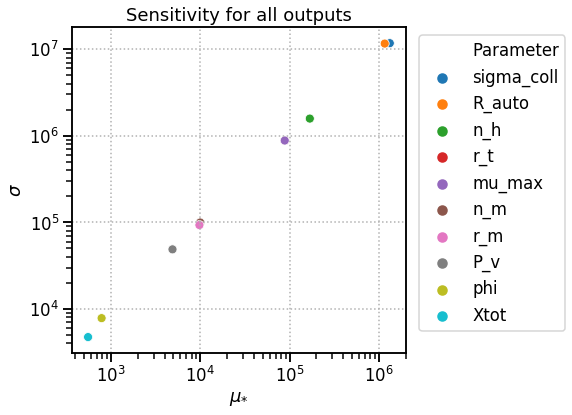

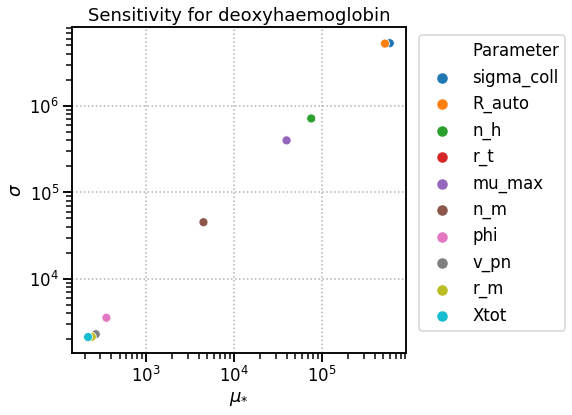

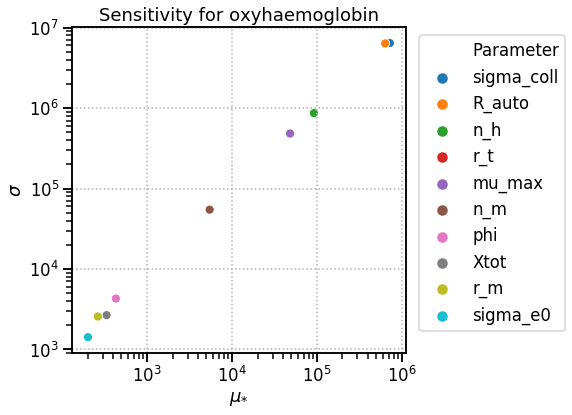

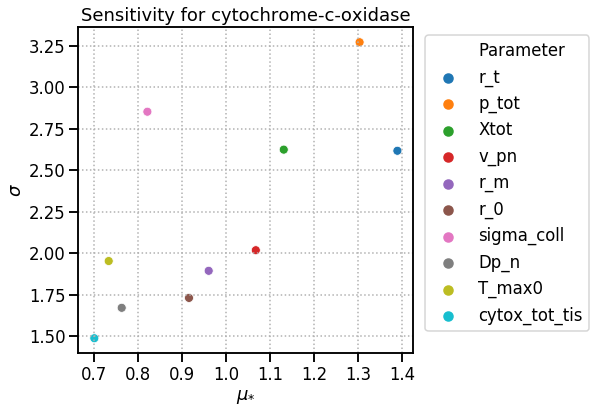

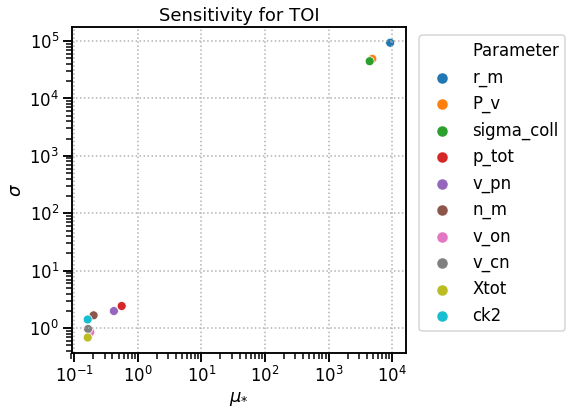

In [46]:
sim_data = {}
for output in ["TOTAL", "HHb", "HbO2", "CCO", "TOI"]:
    print("Working on {}". format(output))
    fig, ax, lgd, d = sensitivity(df_healthy, output, title_dict=sim_title_dict)
    sim_data[output]= d
    fig.savefig("Figures/hypoxia/wide_params/healthy/{}_2d_sensitivity_sim.png".format(output), orientation='landscape', bbox_extra_artists=(lgd,), bbox_inches='tight')
  

Working on TOTAL
Working on HbT
Working on HbD
Working on CCO
Working on TOI


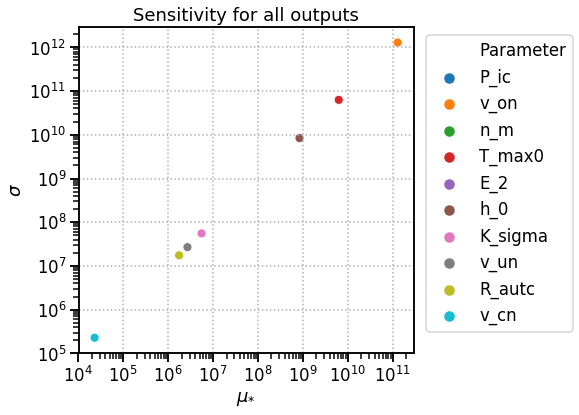

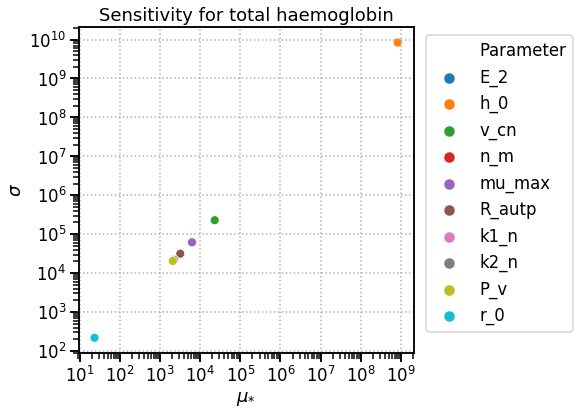

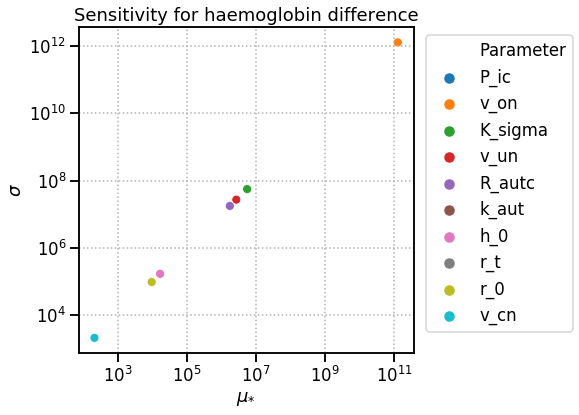

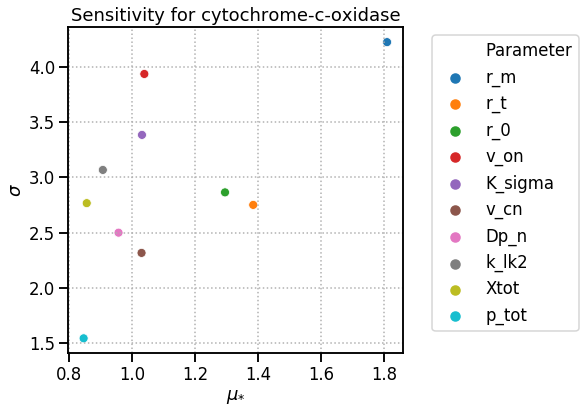

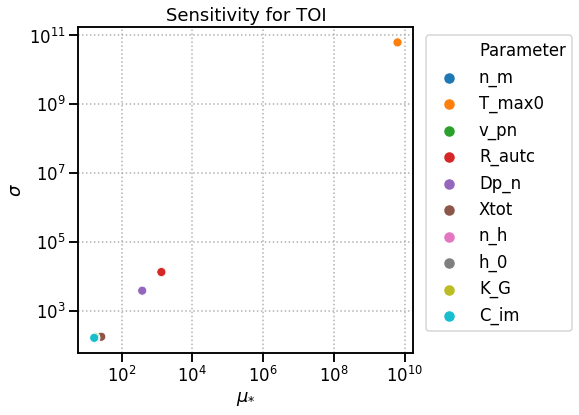

In [49]:
exp_data = {}
for output in ["TOTAL", "HbT", "HbD", "CCO", "TOI"]:
    print("Working on {}". format(output))
    fig, ax, lgd, d = sensitivity(df_experimental, output, title_dict=exp_title_dict)
    exp_data[output] = d
    fig.savefig("Figures/hypoxia/experimental/filtered/wide_params/scaled_inflection/{}_2d_sensitivity_exp.png".format(output), orientation='landscape', bbox_extra_artists=(lgd,), bbox_inches='tight')


In [48]:
exp_data["HbD"]

,mu_star,sigma,Parameter
72,1.287743e+11,1.287743e+12,P_ic
108,1.287697e+11,1.287697e+12,v_on
44,5.549967e+06,5.549965e+07,K_sigma
110,2.693585e+06,2.693585e+07,v_un
84,1.751460e+06,1.751459e+07,R_autc
45,1.670712e+04,1.670443e+05,k_aut
33,1.670580e+04,1.670437e+05,h_0
91,9.538462e+03,9.534937e+04,r_t
83,9.537039e+03,9.534892e+04,r_0
107,2.092858e+02,2.078256e+03,v_cn
